In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Откройте файл с таблицей Выведите последние 10 строк.
Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы?

In [20]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Датасеты/data_ozon.csv')
df['item_price2'] = df['item_price'].str.replace('$', '').astype(float)
print(df.shape)
print(df.dtypes)
df.tail(10)

(4622, 6)
order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price             object
item_price2           float64
dtype: object


,order_id,quantity,item_name,choice_description,item_price,item_price2
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25,9.25
4613,1831,1,Chips,NaN,$2.15,2.15
4614,1831,1,Bottled Water,NaN,$1.50,1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75,8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45,4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75,8.75


**В датафрейме представлены данные по продажам магазина. В нем 4622 строки и 5 столбцов(id заказа, кол-во товара, наименование товара, состав товара, стоимость товара).**


Сколько заказов попало в выборку?
Сколько уникальных категорий товара было куплено? (item_name)

In [21]:
print("Кол-во заказов:",len(df.order_id.unique()))
print("Кол-во уникальных категорий товара:",len(df.item_name.unique()))

Кол-во заказов: 1834
Кол-во уникальных категорий товара: 50


Есть ли в данных пропуски? В каких колонках?   
Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [22]:
df.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
item_price2              0
dtype: int64

**Пропуски есть только в столбце choice_description**

In [23]:
df['choice_description'] = df['choice_description'].fillna('')
df.tail(10)

,order_id,quantity,item_name,choice_description,item_price,item_price2
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25,9.25
4613,1831,1,Chips,,$2.15,2.15
4614,1831,1,Bottled Water,,$1.50,1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75,8.75
4616,1832,1,Chips and Guacamole,,$4.45,4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75,8.75


Какая средняя/минимальная/максимальная цена у товара?

In [27]:
df_items = df.groupby("item_name", as_index = False).agg({"item_price2": ["mean", "min", "max"]})
df_items.head()

item_name item_price2             
                                mean   min    max
0      6 Pack Soft Drink    6.610185  6.49  12.98
1          Barbacoa Bowl   10.187273  8.69  11.75
2       Barbacoa Burrito    9.832418  8.69  11.75
3  Barbacoa Crispy Tacos   10.928182  8.99  18.50
4    Barbacoa Salad Bowl   10.640000  9.39  11.89

Разбейте заказы на три группы: дешевые, средние и дорогие. Порог для групп подберите сами (посмотрите, на около какой суммы чаще берут в каждой группе).

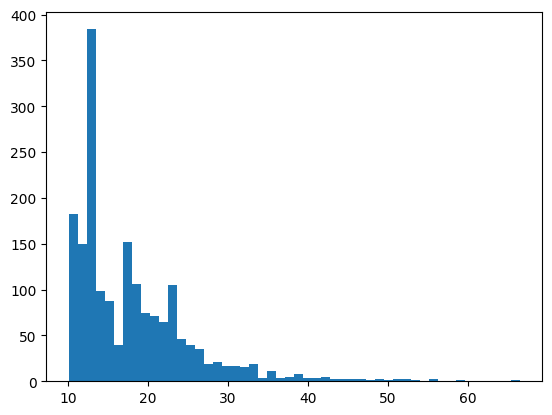

In [42]:
df_orders = df.groupby("order_id", as_index = False)["item_price2"].sum()

df_filtered = df_orders[df_orders["item_price2"] < 70]

plt.hist(df_filtered["item_price2"], bins = 50)

plt.show()

**Основываясь на гистограмме, было принято решение выбрать следующие пороги: 15 и 30**

In [44]:
df_orders['price_group'] = pd.cut(df_orders['item_price2'], bins=[0, 15, 30, float('inf')], labels=['Cheap', 'Medium', 'Expensive'])

print(df_orders)

      order_id  item_price2 price_group
0            1        11.56       Cheap
1            2        16.98      Medium
2            3        12.67       Cheap
3            4        21.00      Medium
4            5        13.70       Cheap
...        ...          ...         ...
1829      1830        23.00      Medium
1830      1831        12.90       Cheap
1831      1832        13.20       Cheap
1832      1833        23.50      Medium
1833      1834        28.75      Medium

[1834 rows x 3 columns]
